## Which animals/breeds are the most adopted? Statistical Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dallas_data = pd.read_csv('Resources/DallasMergedClean.csv', 
                          dtype={'Council District': 'string', 'Intake Total': 'string', 'Outcome Subtype': 'string'})

In [3]:
# All adopted animal types
dal_adopted = dallas_data.loc[(dallas_data['Outcome Type'] == 'RETURNED TO OWNER') 
                            | (dallas_data['Outcome Type'] == 'ADOPTION'), 
                              ['Outcome Type','Animal Type', 'Animal Breed']]
dal_adopted 

,Outcome Type,Animal Type,Animal Breed
4,RETURNED TO OWNER,CAT,DOMESTIC SH
22,RETURNED TO OWNER,DOG,BORDER COLLIE
33,RETURNED TO OWNER,DOG,POMERANIAN
34,RETURNED TO OWNER,DOG,SHEPHERD MIX
36,ADOPTION,CAT,DOMESTIC SH
...,...,...,...
172193,RETURNED TO OWNER,DOG,ROTTWEILER
172196,RETURNED TO OWNER,DOG,PIT BULL
172199,RETURNED TO OWNER,DOG,CHIHUAHUA SH
172200,RETURNED TO OWNER,DOG,SCHNAUZER STAND


In [4]:
# Creating dataframe for animal type adopted bar chart
# Find 3 smaller animal types and change to other
adopt_other = dal_adopted.replace(to_replace =['BIRD', 'LIVESTOCK', 'WILDLIFE'], value ='OTHER')
adopt_count = adopt_other.groupby('Animal Type').count()
adopt_count = adopt_count.drop(columns='Animal Breed')
adopt_count = adopt_count.rename(columns={'Outcome Type':'Total Adopted'})

# Find 3 smaller animal types and change to other
dal_other = dallas_data.replace(to_replace =['BIRD', 'LIVESTOCK', 'WILDLIFE'], value ='OTHER')
dal_count = dal_other.groupby('Animal Type').count()
dal_count.drop('D', inplace=True)

adopt_count['Total Available'] = dal_count['Outcome Type']
adopt_count['Percent Adopted'] = (adopt_count['Total Adopted'] / adopt_count['Total Available']) * 100
adopt_count['Percent Adopted'] = adopt_count['Percent Adopted'].map("{:.2f}%".format)
adopt_count

,Total Adopted,Total Available,Percent Adopted
Animal Type,,,
CAT,12172,39386,30.90%
DOG,69665,125208,55.64%
OTHER,949,7609,12.47%


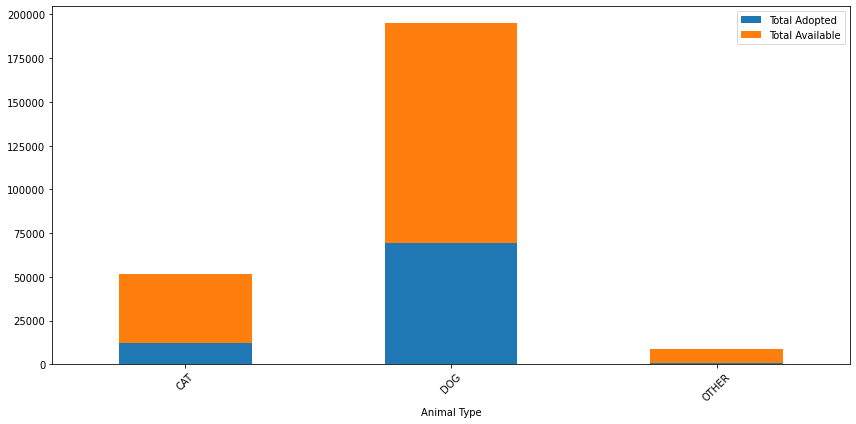

In [5]:
adopt_count.plot(kind="bar", stacked=True, rot=45, figsize=(12,6))

plt.tight_layout()
plt.show()

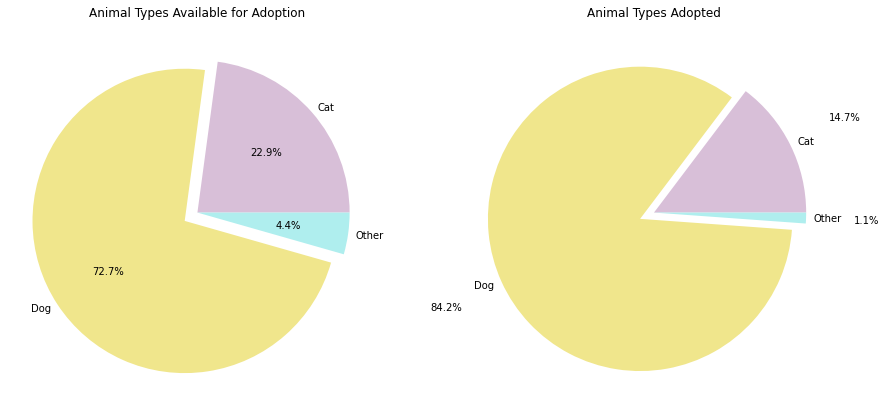

In [6]:
colors = ['thistle', 'khaki', 'paleturquoise']
labels = ['Cat','Dog','Other']

#ax1,ax2 refer to two pies - 1, 2 is 1 row, 2 columns; 2, 1 is 2 rows, 1 column
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15)) 

# Pie showing total number of animal types available for adoption
ax1.pie(adopt_count['Total Available'], colors=colors, labels=labels, labeldistance=1.05, 
        explode=(0, 0.1, 0), autopct="%1.1f%%")
ax1.set_title("Animal Types Available for Adoption")

# Pie showing total number of animal types adopted
ax2.pie(adopt_count['Total Adopted'], colors=colors, labels=labels, labeldistance=1.05, 
        explode=(0, 0.1, 0), autopct="%1.1f%%", pctdistance=1.4)
ax2.set_title("Animal Types Adopted")

plt.show()

## Dogs are by far the most animal available for adoption (72.71%), followed by cats (22.87%).

In [7]:
# Create dataframe for dog breed adoptions
dogs_only = dal_adopted.loc[dal_adopted['Animal Type'] == 'DOG']
dog_group = dogs_only.groupby(['Animal Breed']).count()
dog_group.sort_values(by='Outcome Type', ascending=False, inplace=True)
dog_group = dog_group.rename(columns={'Outcome Type':'Total Adopted'})
dog_group = dog_group.drop('Animal Type', axis=1)

# Finds top 10 dog breeds adopted
dog_group = dog_group.iloc[0:10, :]
dog_group

,Total Adopted
Animal Breed,
PIT BULL,13718
CHIHUAHUA SH,10735
GERM SHEPHERD,8841
LABRADOR RETR,8405
CAIRN TERRIER,2250
ALASKAN HUSKY,1545
SHIH TZU,1212
ROTTWEILER,1149
AUST CATTLE DOG,1061


In [8]:
# Create dataframe for dog breeds available
avail_dogs_only = dallas_data.loc[dallas_data['Animal Type'] == 'DOG']
avail_dogs_only = avail_dogs_only[['Animal Type', 'Animal Breed', 'Outcome Type']]
avail_dog_group = avail_dogs_only.groupby(['Animal Breed']).count()
avail_dog_group.sort_values(by='Animal Type', ascending=False, inplace=True)
avail_dog_group = avail_dog_group.rename(columns={'Animal Type':'Total Available'})
avail_dog_group = avail_dog_group.drop('Outcome Type', axis=1)

# Finds top 10 dog breeds available
avail_dog_group = avail_dog_group.iloc[0:10, :]
avail_dog_group

,Total Available
Animal Breed,
PIT BULL,27623
CHIHUAHUA SH,16664
GERM SHEPHERD,15789
LABRADOR RETR,15210
CAIRN TERRIER,3582
ROTTWEILER,2186
ALASKAN HUSKY,2158
SHIH TZU,1969
BOXER,1908


In [9]:
# Merge dogs available and dogs adopted data frames
dog_merge = pd.merge(dog_group, avail_dog_group, on='Animal Breed', how='outer')
dog_merge['Percent Adopted'] = (dog_merge['Total Adopted'] / dog_merge['Total Available']) * 100
dog_merge['Percent Adopted'] = dog_merge['Percent Adopted'].map("{:.2f}%".format)

dog_merge

,Total Adopted,Total Available,Percent Adopted
Animal Breed,,,
PIT BULL,13718,27623,49.66%
CHIHUAHUA SH,10735,16664,64.42%
GERM SHEPHERD,8841,15789,55.99%
LABRADOR RETR,8405,15210,55.26%
CAIRN TERRIER,2250,3582,62.81%
ALASKAN HUSKY,1545,2158,71.59%
SHIH TZU,1212,1969,61.55%
ROTTWEILER,1149,2186,52.56%
AUST CATTLE DOG,1061,1875,56.59%


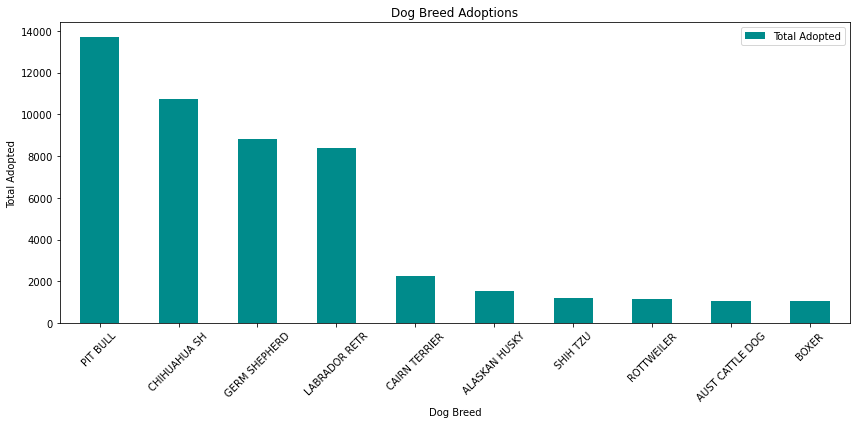

In [10]:
# Create bar plot for top 10 dog breeds adopted
dog_group.plot(kind="bar", rot=45, color='darkcyan', figsize=(12,6))
plt.title("Dog Breed Adoptions")
plt.xlabel("Dog Breed")
plt.ylabel("Total Adopted")

plt.tight_layout()
plt.show()

In [11]:
# Creating dataframe for cat breed adoptions
cats_only = dal_adopted.loc[dal_adopted['Animal Type'] == 'CAT']
cat_group = cats_only.groupby(['Animal Breed']).count()
cat_group.sort_values(by='Outcome Type', ascending=False, inplace=True)
cat_group = cat_group.rename(columns={'Outcome Type':'Total Adopted'})
cat_group = cat_group.drop('Animal Type', axis=1)

# Finds top 10 cat breeds adopted
cat_group = cat_group.iloc[0:10, :]
cat_group

,Total Adopted
Animal Breed,
DOMESTIC SH,10490
DOMESTIC MH,938
DOMESTIC LH,270
SIAMESE,206
RUSSIAN BLUE,81
AMER SH,80
MAINE COON,30
MANX,11
SNOWSHOE,10


In [12]:
# Create dataframe for cat breeds available
avail_cats_only = dallas_data.loc[dallas_data['Animal Type'] == 'CAT']
avail_cats_only = avail_cats_only[['Animal Type', 'Animal Breed', 'Outcome Type']]
avail_cat_group = avail_cats_only.groupby(['Animal Breed']).count()
avail_cat_group.sort_values(by='Animal Type', ascending=False, inplace=True)
avail_cat_group = avail_cat_group.rename(columns={'Animal Type':'Total Available'})
avail_cat_group = avail_cat_group.drop('Outcome Type', axis=1)

# Finds top 10 cat breeds available
avail_cat_group = avail_cat_group.iloc[0:10, :]
avail_cat_group

,Total Available
Animal Breed,
DOMESTIC SH,34109
DOMESTIC MH,2802
DOMESTIC LH,794
SIAMESE,608
AMER SH,500
RUSSIAN BLUE,183
MAINE COON,95
PERSIAN,37
MANX,31


In [13]:
# Merge cats available and cats adopted data frames
cat_merge = pd.merge(cat_group, avail_cat_group, how='outer', on='Animal Breed')
cat_merge['Percent Adopted'] = (cat_merge['Total Adopted'] / cat_merge['Total Available']) * 100
cat_merge['Percent Adopted'] = cat_merge['Percent Adopted'].map("{:.2f}%".format)
cat_merge.dropna(inplace=True)
cat_merge['Total Adopted'] = cat_merge['Total Adopted'].astype(int)
cat_merge['Total Available'] = cat_merge['Total Available'].astype(int)

cat_merge

,Total Adopted,Total Available,Percent Adopted
Animal Breed,,,
DOMESTIC SH,10490,34109,30.75%
DOMESTIC MH,938,2802,33.48%
DOMESTIC LH,270,794,34.01%
SIAMESE,206,608,33.88%
RUSSIAN BLUE,81,183,44.26%
AMER SH,80,500,16.00%
MAINE COON,30,95,31.58%
MANX,11,31,35.48%


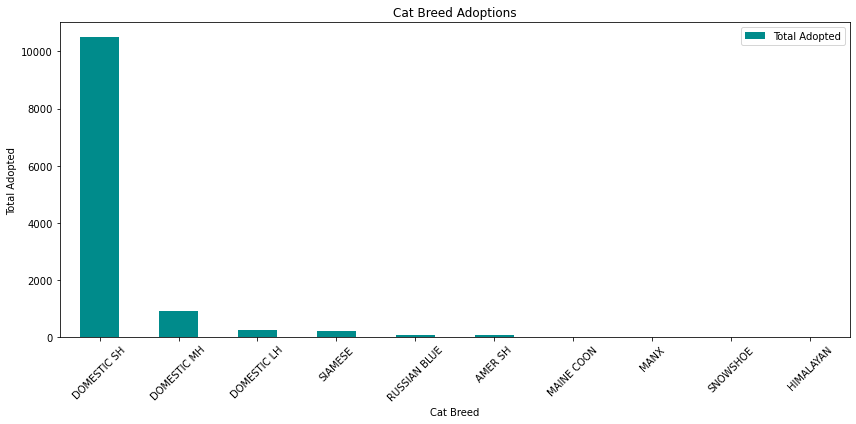

In [14]:
# Create bar plot for top 10 cat breeds adopted
cat_group.plot(kind="bar", rot=45, color='darkcyan', figsize=(12,6))
plt.title("Cat Breed Adoptions")
plt.xlabel("Cat Breed")
plt.ylabel("Total Adopted")

plt.tight_layout()
plt.show()

## The most adopted breeds for dogs are Pit Bulls, Chihuahuas, German Shepards and Labrador Retrievers.  The most adopted breeds for cats are Domestic Shorthair by far.  

### Does dog breed affect the chance of being adopted?
### Null Hypothesis:
### Alternate Hypothesis:

 * Alternate hypothesis - If dark chocolate is related to arterial function in healthy individuals, then consuming 30g of dark chocolate over a one-year period will result in improved arterial function.

  * Null Hypothesis - If dark chocolate is not related to arterial function in healthy individuals, then consuming 30g of dark chocolate over a one-year period will show no improvement in arterial function.


In [15]:
import scipy.stats as stats

In [21]:
# Get top four dog breeds
top_four = dog_group.iloc[0:4, :]
# Create a series 
observed = pd.Series(top_four['Total Adopted'], index=top_four.index)
# Create a data frame
df = pd.DataFrame([observed]).T
# Add a column whose default values are the expected values
df[1] = 10424.75
# Rename the columns
df.columns = ["observed", "expected"]

# View the data frame
df

,observed,expected
Animal Breed,,
PIT BULL,13718,10424.75
CHIHUAHUA SH,10735,10424.75
GERM SHEPHERD,8841,10424.75
LABRADOR RETR,8405,10424.75


In [22]:
critical_value = stats.chi2.ppf(q = 0.95, df = 3)
critical_value

7.814727903251179

In [23]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=1681.5179980335258, pvalue=0.0)